## Working with DRKG in Deep Graph Library (DGL)

Building a heterograph from DRKG in dgl

In [1]:
import pandas as pd
import numpy as np
import dgl

import sys
sys.path.insert(1, 'C:/Users/tessy/Desktop/Notes/SEM III/RESEARCH PAPER/report/utils')
from utils import download_and_extract
download_and_extract()
drkg_file = 'C:/Users/tessy/Desktop/Notes/SEM III/RESEARCH PAPER/report/data/drkg.tsv'
df = pd.read_csv(drkg_file, sep ="\t", header=None)
triplets = df.values.tolist()

Download finished. Unzipping the file...


Assign an ID to each node (entity): create a dictionary of node-types: each dictionary further consists of a dictionary mapping node to an ID.

In [2]:
entity_dictionary = {}
def insert_entry(entry, ent_type, dic):
    if ent_type not in dic:
        dic[ent_type] = {}
    ent_n_id = len(dic[ent_type])
    if entry not in dic[ent_type]:
         dic[ent_type][entry] = ent_n_id
    return dic

for triple in triplets:
    src = triple[0]
    split_src = src.split('::')
    src_type = split_src[0]
    dest = triple[2]
    split_dest = dest.split('::')
    dest_type = split_dest[0]
    insert_entry(src,src_type,entity_dictionary)
    insert_entry(dest,dest_type,entity_dictionary)

Create a dictionary of relations: the key is the relation and the value is the list of (source node ID, destimation node ID) tuples.

In [3]:
edge_dictionary={}
for triple in triplets:
    src = triple[0]
    split_src = src.split('::')
    src_type = split_src[0]
    dest = triple[2]
    split_dest = dest.split('::')
    dest_type = split_dest[0]
    
    src_int_id = entity_dictionary[src_type][src]
    dest_int_id = entity_dictionary[dest_type][dest]
    
    pair = (src_int_id,dest_int_id)
    etype = (src_type,triple[1],dest_type)
    if etype in edge_dictionary:
        edge_dictionary[etype] += [pair]
    else:
        edge_dictionary[etype] = [pair]

## Create a DGL heterograph using the dictionary of relations

In [4]:
graph = dgl.heterograph(edge_dictionary);

## Print the statistics of the created graph

### Number of nodes for each node-type

In [5]:
total_nodes = 0;
for ntype in graph.ntypes:
    print(ntype, '\t', graph.number_of_nodes(ntype));
    total_nodes += graph.number_of_nodes(ntype);
print("Graph contains {} nodes from {} node-types.".format(total_nodes, len(graph.ntypes)))

Anatomy 	 400
Atc 	 4048
Biological Process 	 11381
Cellular Component 	 1391
Compound 	 24313
Disease 	 5103
Gene 	 39220
Molecular Function 	 2884
Pathway 	 1822
Pharmacologic Class 	 345
Side Effect 	 5701
Symptom 	 415
Tax 	 215
Graph contains 97238 nodes from 13 node-types.


### Number of edges for each relation (edge-type) 

In [6]:
total_edges = 0;
for etype in graph.etypes:
    print(etype, '\t', graph.number_of_edges(etype))
    total_edges += graph.number_of_edges(etype);
print("Graph contains {} edges from {} edge-types.".format(total_edges, len(graph.etypes)))

Hetionet::AdG::Anatomy:Gene 	 102240
Hetionet::AeG::Anatomy:Gene 	 526407
Hetionet::AuG::Anatomy:Gene 	 97848
DRUGBANK::carrier::Compound:Gene 	 720
DRUGBANK::ddi-interactor-in::Compound:Compound 	 1379271
DRUGBANK::enzyme::Compound:Gene 	 4923
DRUGBANK::target::Compound:Gene 	 19158
DRUGBANK::treats::Compound:Disease 	 4968
DRUGBANK::x-atc::Compound:Atc 	 15750
GNBR::A+::Compound:Gene 	 1568
GNBR::A-::Compound:Gene 	 1108
GNBR::B::Compound:Gene 	 7170
GNBR::C::Compound:Disease 	 1739
GNBR::E+::Compound:Gene 	 1970
GNBR::E-::Compound:Gene 	 2918
GNBR::E::Compound:Gene 	 32743
GNBR::J::Compound:Disease 	 1020
GNBR::K::Compound:Gene 	 12411
GNBR::Mp::Compound:Disease 	 495
GNBR::N::Compound:Gene 	 12521
GNBR::O::Compound:Gene 	 5573
GNBR::Pa::Compound:Disease 	 2619
GNBR::Pr::Compound:Disease 	 966
GNBR::Sa::Compound:Disease 	 16923
GNBR::T::Compound:Disease 	 54020
GNBR::Z::Compound:Gene 	 2821
Hetionet::CbG::Compound:Gene 	 11571
Hetionet::CcSE::Compound:Side Effect 	 138944
Hetionet::

Just printing the graph ("print(graph)") will also print the graph summary

In [7]:
print(graph)

Graph(num_nodes={'Anatomy': 400, 'Atc': 4048, 'Biological Process': 11381, 'Cellular Component': 1391, 'Compound': 24313, 'Disease': 5103, 'Gene': 39220, 'Molecular Function': 2884, 'Pathway': 1822, 'Pharmacologic Class': 345, 'Side Effect': 5701, 'Symptom': 415, 'Tax': 215},
      num_edges={('Anatomy', 'Hetionet::AdG::Anatomy:Gene', 'Gene'): 102240, ('Anatomy', 'Hetionet::AeG::Anatomy:Gene', 'Gene'): 526407, ('Anatomy', 'Hetionet::AuG::Anatomy:Gene', 'Gene'): 97848, ('Compound', 'DRUGBANK::carrier::Compound:Gene', 'Gene'): 720, ('Compound', 'DRUGBANK::ddi-interactor-in::Compound:Compound', 'Compound'): 1379271, ('Compound', 'DRUGBANK::enzyme::Compound:Gene', 'Gene'): 4923, ('Compound', 'DRUGBANK::target::Compound:Gene', 'Gene'): 19158, ('Compound', 'DRUGBANK::treats::Compound:Disease', 'Disease'): 4968, ('Compound', 'DRUGBANK::x-atc::Compound:Atc', 'Atc'): 15750, ('Compound', 'GNBR::A+::Compound:Gene', 'Gene'): 1568, ('Compound', 'GNBR::A-::Compound:Gene', 'Gene'): 1108, ('Compound',

# Plotting the graph

In [8]:
import dgl.data
import matplotlib.pyplot as plt
import networkx as nx

import dgl
import torch as th

In [9]:
graph.ntypes

['Anatomy',
 'Atc',
 'Biological Process',
 'Cellular Component',
 'Compound',
 'Disease',
 'Gene',
 'Molecular Function',
 'Pathway',
 'Pharmacologic Class',
 'Side Effect',
 'Symptom',
 'Tax']

In [10]:
graph.etypes

['Hetionet::AdG::Anatomy:Gene',
 'Hetionet::AeG::Anatomy:Gene',
 'Hetionet::AuG::Anatomy:Gene',
 'DRUGBANK::carrier::Compound:Gene',
 'DRUGBANK::ddi-interactor-in::Compound:Compound',
 'DRUGBANK::enzyme::Compound:Gene',
 'DRUGBANK::target::Compound:Gene',
 'DRUGBANK::treats::Compound:Disease',
 'DRUGBANK::x-atc::Compound:Atc',
 'GNBR::A+::Compound:Gene',
 'GNBR::A-::Compound:Gene',
 'GNBR::B::Compound:Gene',
 'GNBR::C::Compound:Disease',
 'GNBR::E+::Compound:Gene',
 'GNBR::E-::Compound:Gene',
 'GNBR::E::Compound:Gene',
 'GNBR::J::Compound:Disease',
 'GNBR::K::Compound:Gene',
 'GNBR::Mp::Compound:Disease',
 'GNBR::N::Compound:Gene',
 'GNBR::O::Compound:Gene',
 'GNBR::Pa::Compound:Disease',
 'GNBR::Pr::Compound:Disease',
 'GNBR::Sa::Compound:Disease',
 'GNBR::T::Compound:Disease',
 'GNBR::Z::Compound:Gene',
 'Hetionet::CbG::Compound:Gene',
 'Hetionet::CcSE::Compound:Side Effect',
 'Hetionet::CdG::Compound:Gene',
 'Hetionet::CpD::Compound:Disease',
 'Hetionet::CrC::Compound:Compound',
 'H

In [11]:
graph.canonical_etypes

[('Anatomy', 'Hetionet::AdG::Anatomy:Gene', 'Gene'),
 ('Anatomy', 'Hetionet::AeG::Anatomy:Gene', 'Gene'),
 ('Anatomy', 'Hetionet::AuG::Anatomy:Gene', 'Gene'),
 ('Compound', 'DRUGBANK::carrier::Compound:Gene', 'Gene'),
 ('Compound', 'DRUGBANK::ddi-interactor-in::Compound:Compound', 'Compound'),
 ('Compound', 'DRUGBANK::enzyme::Compound:Gene', 'Gene'),
 ('Compound', 'DRUGBANK::target::Compound:Gene', 'Gene'),
 ('Compound', 'DRUGBANK::treats::Compound:Disease', 'Disease'),
 ('Compound', 'DRUGBANK::x-atc::Compound:Atc', 'Atc'),
 ('Compound', 'GNBR::A+::Compound:Gene', 'Gene'),
 ('Compound', 'GNBR::A-::Compound:Gene', 'Gene'),
 ('Compound', 'GNBR::B::Compound:Gene', 'Gene'),
 ('Compound', 'GNBR::C::Compound:Disease', 'Disease'),
 ('Compound', 'GNBR::E+::Compound:Gene', 'Gene'),
 ('Compound', 'GNBR::E-::Compound:Gene', 'Gene'),
 ('Compound', 'GNBR::E::Compound:Gene', 'Gene'),
 ('Compound', 'GNBR::J::Compound:Disease', 'Disease'),
 ('Compound', 'GNBR::K::Compound:Gene', 'Gene'),
 ('Compound',

In [12]:
import dgl
import networkx as nx
from pyvis.network import Network

# Training DRKG Using TransE_L2
Now we are training the DRKG embeddings using TransE_L2

Before training the model, you need to download the original DRKG source file into your local storage, e.g., ./data/drkg.tsv

## Install DGL-KE
Before training the model, we need to install dgl and dgl-ke packages as well as other dependencies. 

## Prepare train/valid/test set
Before training, we need to split the original drkg into train/valid/test set with a 9:0.5:0.5 manner.

In [14]:
import pandas as pd
import numpy as np
import sys
sys.path.insert(1, 'C:/Users/tessy/Desktop/Notes/SEM III/RESEARCH PAPER/report/utils')
from utils import download_and_extract
download_and_extract()
drkg_file = 'C:/Users/tessy/Desktop/Notes/SEM III/RESEARCH PAPER/report/data/drkg.tsv'

df = pd.read_csv(drkg_file, sep="\t", header=None)
triples = df.values.tolist()

We get 5,869,293 triples, now we will split them into three files

In [15]:
num_triples = len(triples)
num_triples

5874261

In [16]:
# Please make sure the output directory exist.
seed = np.arange(num_triples)
np.random.shuffle(seed)

train_cnt = int(num_triples * 0.9)
valid_cnt = int(num_triples * 0.05)
train_set = seed[:train_cnt]
train_set = train_set.tolist()
valid_set = seed[train_cnt:train_cnt+valid_cnt].tolist()
test_set = seed[train_cnt+valid_cnt:].tolist()

with open("train/drkg_train.tsv", 'w+') as f:
    for idx in train_set:
        f.writelines("{}\t{}\t{}\n".format(triples[idx][0], triples[idx][1], triples[idx][2]))
        
with open("train/drkg_valid.tsv", 'w+') as f:
    for idx in valid_set:
        f.writelines("{}\t{}\t{}\n".format(triples[idx][0], triples[idx][1], triples[idx][2]))

with open("train/drkg_test.tsv", 'w+') as f:
    for idx in test_set:
        f.writelines("{}\t{}\t{}\n".format(triples[idx][0], triples[idx][1], triples[idx][2]))

## Training TransE_l2 model
We can training the TransE_l2 model by simplying using DGL-KE command line. 

https://github.com/awslabs/dgl-ke.

Here we train the model using 8 GPUs on an AWS p3.16xlarge instance.

In [1]:
!DGLBACKEND=pytorch dglke_train --dataset DRKG --data_path ./train --data_files drkg_train.tsv drkg_valid.tsv drkg_test.tsv --format 'raw_udd_hrt' --model_name TransE_l2 --batch_size 2048 \
--neg_sample_size 256 --hidden_dim 400 --gamma 12.0 --lr 0.1 --max_step 100000 --log_interval 1000 --batch_size_eval 16 -adv --regularization_coef 1.00E-07 --test --num_thread 1 --gpu 0 1 2 3 4 5 6 7 --num_proc 8 --neg_sample_size_eval 10000 --async_update

'DGLBACKEND' is not recognized as an internal or external command,
operable program or batch file.


In [20]:
pip install dglke

Note: you may need to restart the kernel to use updated packages.


## A Glance of the Entity and Relation Embeddings

In [3]:
import numpy as np
node_emb = np.load('C:/Users/tessy/Desktop/Notes/SEM III/RESEARCH PAPER/report/data/embed/DRKG_TransE_l2_entity.npy')
relation_emb = np.load('C:/Users/tessy/Desktop/Notes/SEM III/RESEARCH PAPER/report/data/embed/DRKG_TransE_l2_relation.npy')

print(node_emb.shape)
print(relation_emb.shape)

(97238, 400)
(107, 400)


# DRKG Relation Embedding Similarity Analysis
To analyze the trained relation embeddings. 

Here we first load the trained embeddings and map them back into original relation names. And then apply three methodologies to analyze these embeddings:
 - Project the embeddings into low dimension space and visualize their distribution.
 - Use cosine distance to analyze the similarity between each relation.
 - Use frobenius distance to analyze the similarity between each relation.

In [3]:
import pandas as pd
import numpy as np
import os
import csv

## Loading Relation ID Mapping

In [5]:
rel2id = {}
id2rel = {}
with open("C:/Users/tessy/Desktop/Notes/SEM III/RESEARCH PAPER/report/data/relations.tsv", newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile, delimiter='\t', fieldnames=['rel','id'])
    for row_val in reader:
        id = row_val['id']
        relation = row_val['rel']

        rel2id[relation] = int(id)
        id2rel[int(id)] = relation

print("Number of relations: {}".format(len(rel2id)))

Number of relations: 107


## Loading Relation Embeddings

In [6]:
rel_emb = np.load('C:/Users/tessy/Desktop/Notes/SEM III/RESEARCH PAPER/report/data/embed/DRKG_TransE_l2_relation.npy')
print(rel_emb.shape)

(107, 400)


## General Relation Embedding Clustering
Here we use t-SNE to convert relation embeddings into low dimension space and visualize their distribution.

C:\Users\tessy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\tessy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\tessy\AppData\Local\Temp\ipykernel_6332\3852980711.py:18: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `np.compat.long` is itself an alias. Doing this will not modify any behaviour and is safe. When replacing `np.long`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details

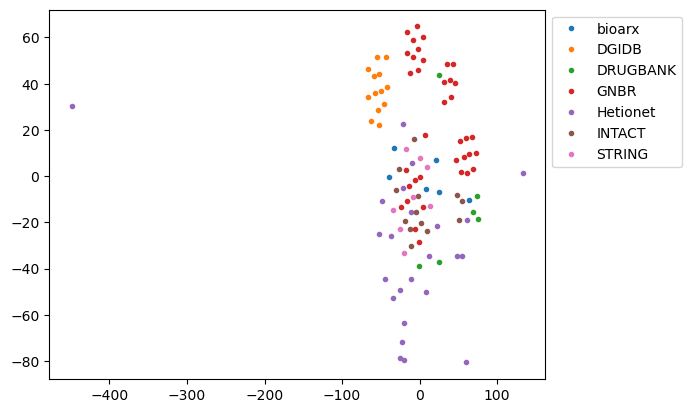

In [7]:
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.utils import check_random_state
from sklearn.manifold import TSNE

dataset_id = {}
for rel_name, i in rel2id.items():
    rel_key = rel_name.split('::')[0]
    if dataset_id.get(rel_key, None) is None:
        dataset_id[rel_key] = []
    dataset_id[rel_key].append(i)

X_embedded = TSNE(n_components=2).fit_transform(rel_emb).T
p = cm.rainbow(int(255/2 * 1))
fig = plt.figure()
ax = fig.add_subplot(111)
for key, val in dataset_id.items():
    val = np.asarray(val, dtype=np.long)

    ax.plot(X_embedded[0][val], X_embedded[1][val], '.', label=key)

lgd = ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig('relation.eps', bbox_extra_artists=(lgd,), bbox_inches='tight', format='eps')

## Pair-wise Relation Embedding Cosine Similarity
We calculate the pair-wise embedding similarity using cosine distance and output the top10 most similar pairs.

In [8]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(rel_emb)
idx = np.flip(np.argsort(similarity), axis=1)

max_pairs = []
for i in range(idx.shape[0]):
    j = 1
    while (similarity[i][idx[i][j]] > 0.9):
        max_pairs.append((id2rel[idx[i][0]], id2rel[idx[i][j]], similarity[i][idx[i][j]]))
        j += 1

def sort_score(pair):
    return pair[2]

max_pairs.sort(reverse=True, key=sort_score)
sim_pairs = []
for i, pair in enumerate(max_pairs):
    if i % 2 == 0:
        sim_pairs.append(pair)

sim_pairs[:10]

[('GNBR::E::Compound:Gene', 'GNBR::K::Compound:Gene', 0.98599327),
 ('GNBR::E::Compound:Gene', 'GNBR::E+::Compound:Gene', 0.9829707),
 ('GNBR::N::Compound:Gene', 'GNBR::E-::Compound:Gene', 0.96987224),
 ('GNBR::E::Compound:Gene', 'GNBR::E-::Compound:Gene', 0.96532124),
 ('GNBR::K::Compound:Gene', 'GNBR::E+::Compound:Gene', 0.9564866),
 ('GNBR::E+::Compound:Gene', 'GNBR::E-::Compound:Gene', 0.95019233),
 ('GNBR::L::Gene:Disease', 'GNBR::G::Gene:Disease', 0.9419448),
 ('GNBR::K::Compound:Gene', 'GNBR::E-::Compound:Gene', 0.94074607),
 ('GNBR::J::Gene:Disease', 'GNBR::Md::Gene:Disease', 0.9319676),
 ('GNBR::J::Gene:Disease', 'GNBR::Te::Gene:Disease', 0.93183714)]

Then we draw a histogram of how the pair-wise similarity score distributed.

(11449,)


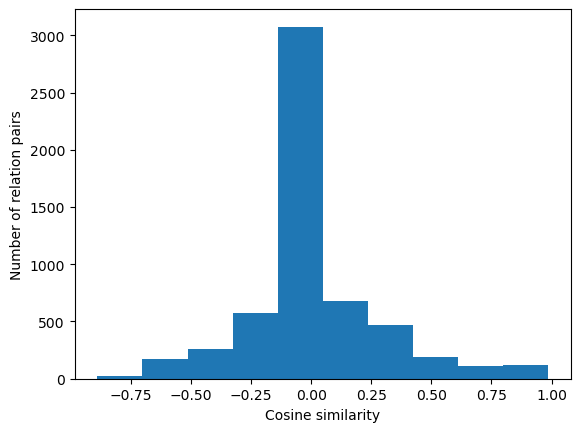

In [9]:
similarity=similarity.flatten()
print(similarity.shape)

# cleanup self-compare and dup-compare
s = similarity < 0.99
s = np.unique(similarity[s])
plt.xlabel('Cosine similarity')
plt.ylabel('Number of relation pairs')
plt.hist(s)
plt.savefig('relation-sim.eps', format='eps')

# DRKG Entity Embedding Similarity Analysis
Now we are going to analyze the trained entity embeddings

We first load the trained entity embeddings and map them back into original entity names. And then apply two methodologies to analyze these embeddings:
 - Project all the entity embeddings into low dimension space and visualize their distribution.
 - Use cosine distance to analyze the similarity between each entity.

## Loading Entity ID Mapping

In [4]:
entity2id = {}
id2entity = {}
with open("C:/Users/tessy/Desktop/Notes/SEM III/RESEARCH PAPER/report/data/entities.tsv", newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile, delimiter='\t', fieldnames=['entity','id'])
    for row_val in reader:
        id = row_val['id']
        entity = row_val['entity']

        entity2id[entity] = int(id)
        id2entity[int(id)] = entity

print("Number of entities: {}".format(len(entity2id)))

Number of entities: 97238


## Loading Entity Embeddings

In [5]:
entity_emb = np.load('C:/Users/tessy/Desktop/Notes/SEM III/RESEARCH PAPER/report/data/embed/DRKG_TransE_l2_entity.npy')
print(entity_emb.shape)

(97238, 400)


## General Entity Embedding Clustering
Here we use t-SNE to convert entity embeddings into low dimension space and visualize their distribution.

In [6]:
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.utils import check_random_state
from MulticoreTSNE import MulticoreTSNE as TSNE

X_embedded = TSNE(n_components=2, n_jobs=40).fit_transform(entity_emb).T

#plt.savefig('entityation.png')

ModuleNotFoundError: No module named 'MulticoreTSNE'

In [1]:
pip install MulticoreTSNE

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [27 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-39
  creating build\lib.win-amd64-cpython-39\MulticoreTSNE
  copying MulticoreTSNE\__init__.py -> build\lib.win-amd64-cpython-39\MulticoreTSNE
  creating build\lib.win-amd64-cpython-39\MulticoreTSNE\tests
  copying MulticoreTSNE\tests\test_base.py -> build\lib.win-amd64-cpython-39\MulticoreTSNE\tests
  copying MulticoreTSNE\tests\__init__.py -> build\lib.win-amd64-cpython-39\MulticoreTSNE\tests
  running egg_info
  writing MulticoreTSNE.egg-info\PKG-INFO
  writing dependency_links to MulticoreTSNE.egg-info\dependency_links.txt
  writing requirements to MulticoreTSNE.egg-info\requires.txt
  writing top-level names to MulticoreTSNE.egg-info\top_level.txt
  reading manifest file 'MulticoreTSNE.egg-info\SOURCES.txt'
  reading manifest template


  Using cached MulticoreTSNE-0.1.tar.gz (20 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for MulticoreTSNE
Failed to build MulticoreTSNE
  Running setup.py install for MulticoreTSNE: started
  Running setup.py install for MulticoreTSNE: finished with status 'error'


In [17]:
pip install cmake

     ---------------------------------------- 32.6/32.6 MB 5.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## Calculate entity cosine similarity

In [7]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(entity_emb)

MemoryError: Unable to allocate 35.2 GiB for an array with shape (97238, 97238) and data type float32

In [9]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(entity_emb)
idx = np.flip(np.argsort(similarity), axis=1)

max_pairs = []
for i in range(idx.shape[0]):
    j = 1
    while (similarity[i][idx[i][j]] > 0.9):
        max_pairs.append((id2entity[idx[i][0]], id2entity[idx[i][j]], similarity[i][idx[i][j]]))
        j += 1

def sort_score(pair):
    return pair[2]

max_pairs.sort(reverse=True, key=sort_score)
sim_pairs = []
for i, pair in enumerate(max_pairs):
    if i % 2 == 0:
        sim_pairs.append(pair)

sim_pairs[:10]

MemoryError: Unable to allocate 35.2 GiB for an array with shape (97238, 97238) and data type float32